In [1]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First of all, we have to read the data: <br>
- parse_dates: indicates that the index has time format
- index_col: indicates the index column

In [3]:
Data = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=True, index_col='timestamp')


We plot the time series, in order to show the polt we specify __plt.show__

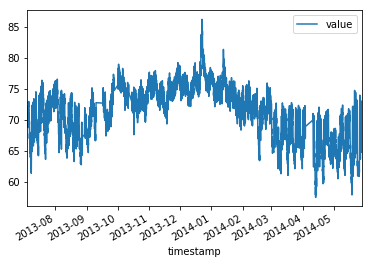

In [4]:
Data.plot()
plt.show()

In [3]:
Data

NameError: name 'Data' is not defined

Changes the Data into a __Timeseries__

In [6]:
ts = Data['value'] 
ts.head()

timestamp
2013-07-04 00:00:00    69.880835
2013-07-04 01:00:00    71.220227
2013-07-04 02:00:00    70.877805
2013-07-04 03:00:00    68.959400
2013-07-04 04:00:00    69.283551
Name: value, dtype: float64

In [7]:
ts['2013-07-04 00:00:00']

69.880835140000002

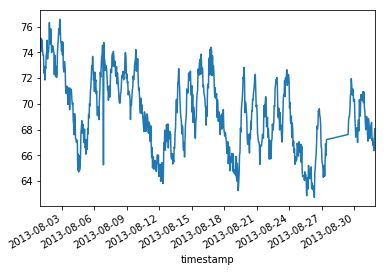

In [48]:
ts_sample = ts['2013-08']
ts_sample.plot()
plt.show()

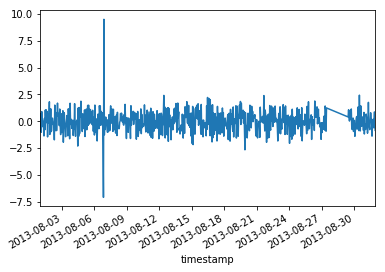

In [49]:
ts_sample_d = ts_sample.diff()
ts_sample_d.plot()
plt.show()

This library contains tools to perform different time series analysis:<br>
- ACF
- PACF

In [50]:
import statsmodels as sm
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
ts_sample_d=ts_sample_d[~ts_sample_d.isnull()]

In [57]:
sm.tsa.stattools.acf(ts_sample_d)

array([  1.00000000e+00,  -2.76649498e-01,   4.92626208e-02,
         8.92807729e-02,   4.10021266e-02,   3.29267807e-02,
         3.68719273e-02,  -9.12180216e-02,  -2.98185871e-02,
        -2.23572578e-02,   2.50722626e-03,  -1.60474709e-01,
        -5.20005358e-02,  -1.31409781e-01,   1.33689715e-03,
        -6.14968787e-02,  -6.61037080e-02,  -4.91199765e-02,
         3.94171723e-02,   1.17578821e-02,   1.13403977e-02,
         5.79492596e-02,   7.84182974e-02,   4.93403904e-02,
         8.92435529e-02,   9.31702089e-02,   4.93058820e-02,
         8.04560071e-02,   4.13181965e-02,   2.43422949e-02,
        -1.06166328e-02,  -1.25500814e-02,  -4.04947341e-02,
        -3.44029651e-02,  -4.57527683e-02,  -1.09609723e-01,
        -3.16920536e-02,  -6.09877368e-02,  -9.64776950e-02,
         6.70706821e-04,  -8.23582177e-02])

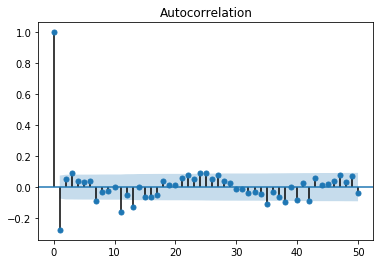

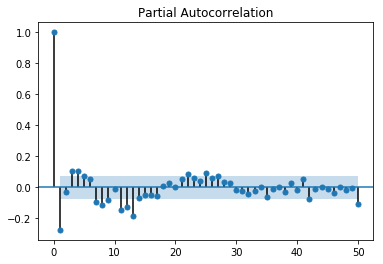

In [58]:
plot_acf(ts_sample_d, lags=50)
plot_pacf(ts_sample_d, lags=50)
plt.show()

In [59]:
model = ARIMA(ts_sample, order=(1,1,1))

In [60]:
m_fit = model.fit(d = 0)

In [61]:
print(m_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  696
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -961.556
Method:                       css-mle   S.D. of innovations              0.963
Date:                Tue, 27 Feb 2018   AIC                           1931.112
Time:                        14:41:17   BIC                           1949.293
Sample:                    08-01-2013   HQIC                          1938.142
                         - 08-31-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0103      0.028     -0.365      0.715      -0.065       0.045
ar.L1.D.value    -0.2239      0.100     -2.235      0.026      -0.420      -0.028
ma.L1.D.value    -0.0576      0.099     

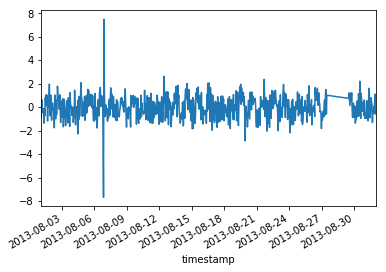

In [62]:
m_fit.resid.plot()
plt.show()

In [65]:
output = m_fit.forecast(star)

In [66]:
output

(array([ 67.44133483]),
 array([ 0.9632422]),
 array([[ 65.5534148 ,  69.32925485]]))

In [63]:
history = [x for x in ts_sample]

In [64]:
history

[74.396538299999975,
 75.109012770000007,
 74.090657840000006,
 74.994785590000006,
 74.490083850000005,
 74.159684310000003,
 73.770748830000002,
 73.761944,
 72.392673090000002,
 72.654617819999999,
 71.858423909999999,
 72.907267020000006,
 72.743471270000001,
 73.808826159999995,
 74.020685689999993,
 74.938303419999997,
 73.482710999999995,
 74.169979459999993,
 74.017518429999996,
 74.498140400000025,
 76.312021900000005,
 75.084843250000006,
 74.659430659999998,
 75.822126979999993,
 74.856976599999996,
 73.987857980000001,
 74.224123860000006,
 74.515753860000004,
 74.457782109999997,
 74.126436060000003,
 73.999543020000004,
 72.268245269999994,
 73.776412800000003,
 72.90101937,
 72.117769960000004,
 72.924992169999996,
 72.051875629999998,
 72.384375449999993,
 74.076305289999993,
 74.619207529999997,
 75.085249379999993,
 75.82866138,
 75.42713311,
 76.56950166,
 76.179633789999997,
 74.940748029999995,
 74.764188369999999,
 74.125406949999999,
 74.840513709999996,
 73.7992

In [ ]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in ts_sample]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()